In [13]:
import os
import matplotlib.pyplot as plt
import pypsa
import numpy as np
import pandas as pd
import yaml

with open('../../pypsa-earth/config.yaml', 'r') as file:
    config = yaml.safe_load(file)

C:\Users\kunde\anaconda3\envs\esm-2024\lib\site-packages\pypsa\networkclustering.py:16: UserWarning: The namespace `pypsa.networkclustering` is deprecated and will be removed in PyPSA v0.24. Please use `pypsa.clustering.spatial instead`. 
  warnings.warn(


In [16]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
folder_name = "pypsa-earth"
scenario_PyPSA = "SEA_AIMS_"

years = [2020,2025,2030,2035,2040,2045,2050]

fn_costs = {year:pd.read_csv(f"../../{folder_name}/resources/{scenario_PyPSA + str(year)}/costs.csv", index_col=["technology", "parameter"]).sort_index() for year in years}

<AxesSubplot:>

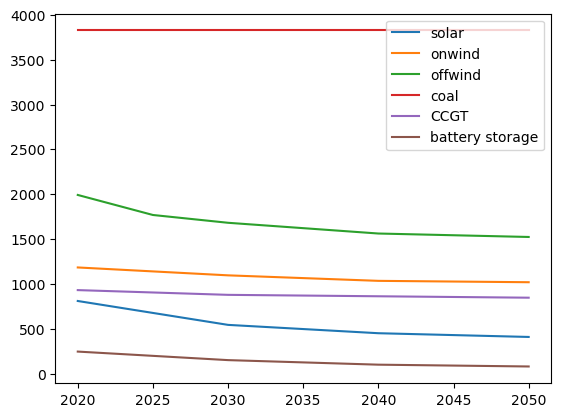

In [9]:
fig, ax = plt.subplots()

df.T.plot(ax=ax)
#ax.set_yscale('log')

In [14]:
parameter = "investment"
target_compare = ["solar", "onwind", "offwind" , "coal", "CCGT", "battery storage"] # "battery storage"

df = pd.DataFrame(columns=years, index=target_compare)

for year in years:
    for t in target_compare:
        df.loc[t,year] = fn_costs[year].loc[(t,parameter),"value"]

In [17]:
scenario_PyPSA = "SEA_EXIST_"
folder_name = "pypsa-earth"
dec_name = "BAU"

network_name = "elec_s_200_ec_lcopt_3H"

years = [2020,2025,2030,2035,2040,2045,2050]

fn = {year:pypsa.Network(f"../../{folder_name}/results/{scenario_PyPSA + str(year)}/networks/{network_name}.nc") for year in years}

INFO:pypsa.io:Imported network elec_s_200_ec_lcopt_3H.nc has buses, carriers, generators, lines, links, loads, stores
INFO:pypsa.io:Imported network elec_s_200_ec_lcopt_3H.nc has buses, carriers, generators, lines, links, loads, stores
INFO:pypsa.io:Imported network elec_s_200_ec_lcopt_3H.nc has buses, carriers, generators, lines, links, loads, stores
INFO:pypsa.io:Imported network elec_s_200_ec_lcopt_3H.nc has buses, carriers, generators, lines, links, loads, stores
INFO:pypsa.io:Imported network elec_s_200_ec_lcopt_3H.nc has buses, carriers, generators, lines, links, loads, stores
INFO:pypsa.io:Imported network elec_s_200_ec_lcopt_3H.nc has buses, carriers, generators, lines, links, loads, stores
INFO:pypsa.io:Imported network elec_s_200_ec_lcopt_3H.nc has buses, carriers, generators, lines, links, loads, stores


In [96]:
unit_carrier = {'Coal':'€/kW', 
                'Lignite':'€/kW', 
                'Combined-Cycle Gas':'€/kW', 
                'Offshore Wind (DC)':'€/kW',
                'Offshore Wind (AC)':'€/kW', 
                'Onshore Wind':'€/kW', 
                'Solar':'€/kW', 
                'Battery Storage':'€/kWh',
                'battery charger':'€/kW'
               }

df_all = pd.DataFrame()

for year in [2020,2030,2040,2050]:
    n = fn[year]
    df = pd.DataFrame(data={year:n.statistics.capex()/n.statistics.optimal_capacity()})
    if df_all.empty:
        df_all = df
    else:
        df_all = pd.concat([df_all,df], axis=1)

df_all = df_all.groupby(df_all.index.get_level_values(1)).sum()
df_all = round(df_all.loc[["Coal","Lignite","Combined-Cycle Gas","Offshore Wind (DC)","Offshore Wind (AC)","Onshore Wind","Solar","battery charger","Battery Storage"],:]/1e3, 2)
df_all["Unit"] = unit_carrier
df_all = df_all.loc[:,["Unit",2020,2030,2040,2050]]
df_all = df_all.rename(index={'Coal':'Coal (All types)'})

In [100]:
df_all.to_csv("../Tables/technology_developement.csv")

In [103]:
fn[2050].statistics()

Capacity Factor  Capital Expenditure  \
          carrier                                                    
Generator Coal                       0.641026         1.427041e+09   
          Coal-Cfb                   0.762218         1.793900e+09   
          Coal-Sc                    0.750618         6.827569e+09   
          Coal-Subc                  0.837765         2.057213e+10   
          Coal-Usc                   0.999997         1.391903e+09   
          Combined-Cycle Gas         0.471497         3.416871e+10   
          Lignite                    0.816961         2.269294e+09   
          Offshore Wind (AC)         0.295332         1.336788e+06   
          Offshore Wind (DC)         0.282525         2.573702e+07   
          Oil                        0.008926         1.735076e+06   
          Onshore Wind               0.403968         1.656197e+10   
          Run of River               0.999155         1.755106e+10   
          Solar                      0.143172         7.916253e+10   
Line      AC                         0.364905         1.611610e+10   
Link      B2B                        0.217926         0.000000e+00   
          DC                         0.489719         6.759005e+08   
          H2 electrolysis            0.410217         2.993910e+05   
          H2 fuel cell               0.177724         3.128275e+05   
          battery charger            0.214067         6.291155e+09   
          battery discharger         0.197284         0.000000e+00   
Load      -                               NaN                  NaN   
Store     Battery Storage            0.465706         2.415388e+10   
          Hydrogen Storage           0.497643         3.498404e+05   

                               Curtailment      Dispatch  Installed Capacity  \
          carrier                                                              
Generator Coal                0.000000e+00  2.234924e+07        3.980000e+03   
          Coal-Cfb            0.000000e+00  3.340630e+07        5.003165e+03   
          Coal-Sc             0.000000e+00  1.252090e+08        1.904200e+04   
          Coal-Subc           0.000000e+00  4.210679e+08        5.737540e+04   
          Coal-Usc            0.000000e+00  3.400622e+07        3.882000e+03   
          Combined-Cycle Gas  0.000000e+00  1.409035e+09        4.313430e+04   
          Lignite             0.000000e+00  4.816129e+07        6.729657e+03   
          Offshore Wind (AC)  3.342499e+03  1.415915e+04        4.732925e+00   
          Offshore Wind (DC)  4.905213e+04  2.289809e+05        9.174407e+01   
          Oil                 0.000000e+00  3.471689e+03        4.440000e+01   
          Onshore Wind        5.238474e+07  6.226433e+08        2.501435e+03   
          Run of River        0.000000e+00  4.984819e+08        5.695247e+04   
          Solar               4.634847e+07  3.295217e+09        2.313479e+04   
Line      AC                           NaN  9.013689e+07        1.023559e+06   
Link      B2B                          NaN -4.651216e+06        4.000000e+03   
          DC                           NaN  4.182383e+07        2.453562e+04   
          H2 electrolysis              NaN -8.551450e+03        0.000000e+00   
          H2 fuel cell                 NaN -5.980884e+03        0.000000e+00   
          battery charger              NaN -1.227425e+09        0.000000e+00   
          battery discharger           NaN -1.178328e+09        0.000000e+00   
Load      -                            NaN -6.413588e+09                 NaN   
Store     Battery Storage              NaN -3.469356e-08        0.000000e+00   
          Hydrogen Storage             NaN -2.220446e-15        0.000000e+00   

                              Market Value  Operational Expenditure  \
          carrier                                                     
Generator Coal                6.059114e+01             7.201554e+08   
          Coal-Cfb            5.626477e+01             9.491932e+